### Import useful libraries

In [2]:
import glob
import os
import csv
import pandas as pd
import numpy as np
import datetime
import matplotlib
from matplotlib import pyplot as plt
import matplotlib.ticker as ticker
from matplotlib.dates import DateFormatter
from datetime import datetime, timedelta
import pyreadr
from datetime import datetime
import time

from windrose import WindroseAxes
import matplotlib.cm as cm
from matplotlib.offsetbox import AnchoredText

from scipy import stats
import statsmodels.api as sm
from statsmodels.distributions.mixture_rvs import mixture_rvs

### 1) Analysis of MTR

### Open the 'rds' file containing the MTR that I prevuoisly calculated in R using MR1 Analysis Tools
#### This file contains average MTR per day and night, per single altitude bin, and for all bird classes

In [6]:
### Open file and print it to the screen
mtr_path = "./Data/" #path to MTR data
file_name = mtr_path + 'mtr_db_20210211_ams_bs290_20210311_20210901_dayNight_25m-1025m-1bin_pawaswlabifl_rot-1-0_pulse-S.rds'
result = pyreadr.read_r(file_name)

df = result[None]
df.head()

,timeChunkId,timeChunkDateSunset,timeChunkDate,timeChunkBegin,timeChunkEnd,timeChunkDuration_sec,blindTime_sec,operationTime_sec,observationTime_sec,observationTime_h,...,altitudeQuantile_0.25.unid_bird,altitudeQuantile_0.5.unid_bird,altitudeQuantile_0.75.unid_bird,altitudeQuantile_0.95.unid_bird,meanAltitude.bird_flock,altitudeQuantile_0.05.bird_flock,altitudeQuantile_0.25.bird_flock,altitudeQuantile_0.5.bird_flock,altitudeQuantile_0.75.bird_flock,altitudeQuantile_0.95.bird_flock
0,1,2021-03-09 23:00:00,2021-03-10,2021-03-10 23:00:00,2021-03-11 05:29:45,23385.0,4004.0,16183.0,12179.0,3.383056,...,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0
1,2,2021-03-10 23:00:00,2021-03-11,2021-03-11 05:29:45,2021-03-11 18:11:44,45719.0,8135.0,30119.0,21984.0,6.106667,...,65.4,162.9,287.4,659.4,247.892332,36.9,57.9,57.9,524.4,780.9
2,3,2021-03-10 23:00:00,2021-03-11,2021-03-11 18:11:44,2021-03-12 05:27:26,40542.0,3124.0,27342.0,24218.0,6.727222,...,515.4,681.9,846.9,990.9,479.486843,168.9,333.9,462.9,594.9,821.4
3,4,2021-03-11 23:00:00,2021-03-12,2021-03-12 05:27:26,2021-03-12 18:13:31,45965.0,8830.0,30072.0,21242.0,5.900556,...,32.4,176.4,509.4,792.9,379.340178,42.9,42.9,516.9,576.9,681.9
4,5,2021-03-11 23:00:00,2021-03-12,2021-03-12 18:13:31,2021-03-13 05:25:07,40296.0,11939.0,27096.0,15157.0,4.210278,...,554.4,681.9,825.9,974.4,468.654467,230.4,230.4,531.9,591.9,689.4


### Extract dates

In [10]:
date_file = df['timeChunkDate']

In [12]:
### define interval of dates I am interested in
ref_date_1 = datetime(2021,4,1).date() 
ref_date_2 = datetime(2021,4,30).date()

time_idx = np.where(np.all([date_file>=ref_date_1, date_file<=ref_date_2],axis=0))

### Plot MTR time series for one class (e.g., passerine)

60


<>:19: SyntaxWarning: invalid escape sequence '\/'
<>:19: SyntaxWarning: invalid escape sequence '\/'
C:\Users\leona\AppData\Local\Temp\ipykernel_10156\1472145583.py:19: SyntaxWarning: invalid escape sequence '\/'
  ax.set_ylabel('MTR [$birds\/hr^{-1}\/km^{-1}$]', fontsize=16)


Text(0.5, 1.0, 'Passerine, 2021-04-01 to 2021-04-30')

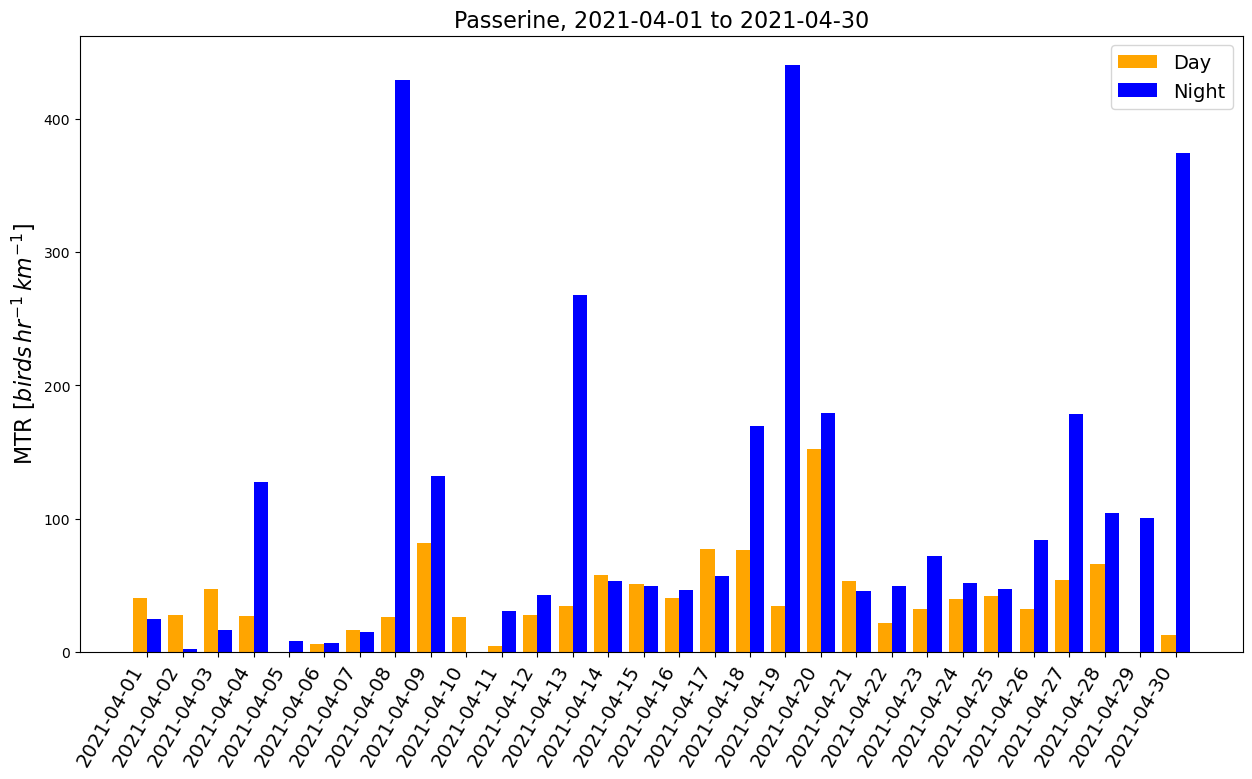

In [16]:
nfiles = len(time_idx[0])
vec = np.arange(nfiles)
vec2 = np.arange(nfiles/2)
print(nfiles)

vec_e = [ele for ele in vec if ele%2==0 ] 
vec_o = [ele for ele in vec if ele%2!=0 ] 


width = 0.4  # the width of the bars

plt.figure(figsize=(15,8))

p1 = plt.bar(vec2 - width/2, df['mtr.passerine_type'][time_idx[0][vec_e]], width, color='orange')
p2 = plt.bar(vec2 + width/2, df['mtr.passerine_type'][time_idx[0][vec_o]], width, color='blue')
plt.legend((p1[0], p2[0]), ('Day','Night'),fontsize=14)

ax = plt.gca()
ax.set_ylabel('MTR [$birds\/hr^{-1}\/km^{-1}$]', fontsize=16)
ax.set_xlabel('')
plt.xticks(vec2, fontsize=12)    
ax.set_xticklabels(df['timeChunkDate'][time_idx[0][vec_o]],rotation=60, ha='right',fontsize=14)
plt.locator_params(axis='x', nbins=len(time_idx[0]))

plt.title('Passerine, {} to {}'.format(df['timeChunkDate'][time_idx[0][0]],df['timeChunkDate'][time_idx[0][-1]]), fontsize= 16)

### Plot MTR time series for all birds

<>:58: SyntaxWarning: invalid escape sequence '\/'
<>:58: SyntaxWarning: invalid escape sequence '\/'
C:\Users\leona\AppData\Local\Temp\ipykernel_10156\2351919567.py:58: SyntaxWarning: invalid escape sequence '\/'
  ax.set_ylabel('Mean MTR [$individuals\/hr^{-1}\/km^{-1}$]', fontsize=16)


60


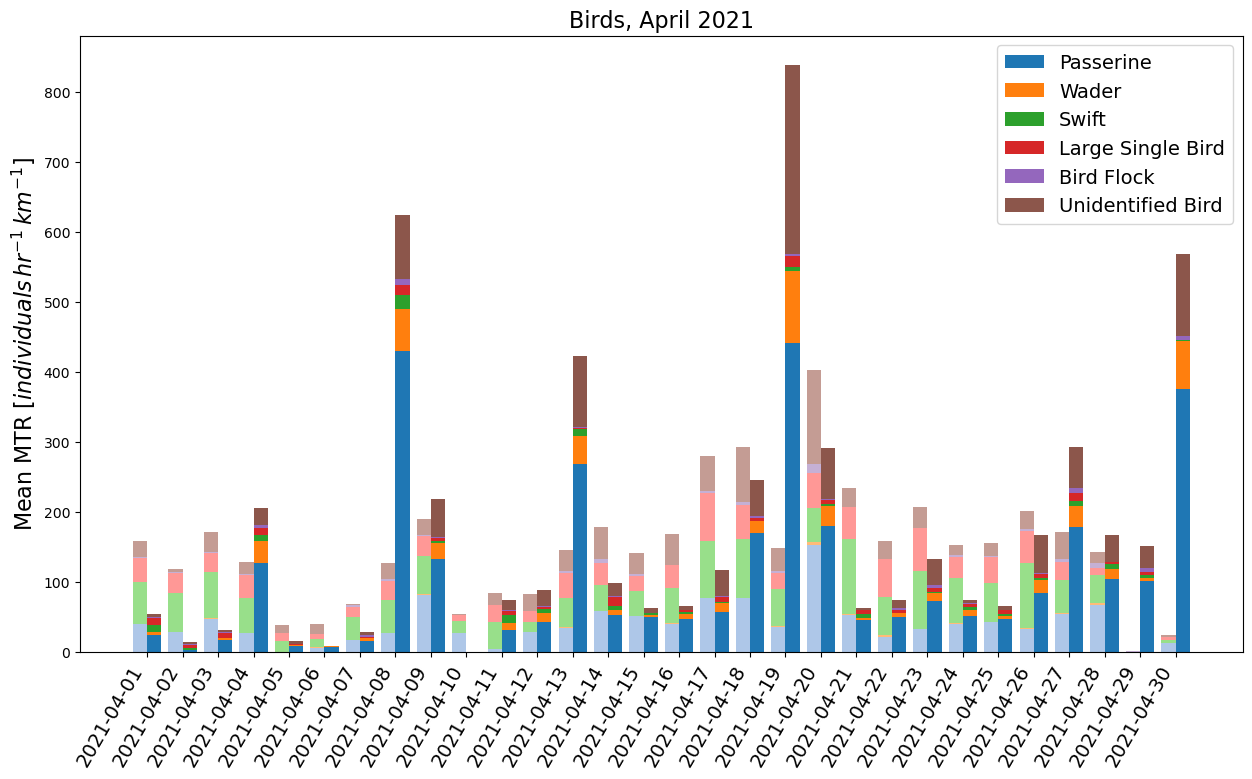

In [20]:
nfiles = len(time_idx[0])
vec = np.arange(nfiles)
vec2 = np.arange(nfiles/2)
print(nfiles)

vec_e = [ele for ele in vec if ele%2==0 ] 
vec_o = [ele for ele in vec if ele%2!=0 ] 


width = 0.4  # the width of the bars

plt.figure(figsize=(15,8))

palette = plt.get_cmap('tab20')


mtr_pass_d = df['mtr.passerine_type'][time_idx[0][vec_e]]
mtr_pass_n = df['mtr.passerine_type'][time_idx[0][vec_o]]

mtr_wader_d = df['mtr.wader_type'][time_idx[0][vec_e]]
mtr_wader_n = df['mtr.wader_type'][time_idx[0][vec_o]]

mtr_swift_d = df['mtr.swift_type'][time_idx[0][vec_e]]
mtr_swift_n = df['mtr.swift_type'][time_idx[0][vec_o]]

mtr_large_d = df['mtr.large_bird'][time_idx[0][vec_e]]
mtr_large_n = df['mtr.large_bird'][time_idx[0][vec_o]]

mtr_flock_d = df['mtr.bird_flock'][time_idx[0][vec_e]]
mtr_flock_n = df['mtr.bird_flock'][time_idx[0][vec_o]]

mtr_unid_d = df['mtr.unid_bird'][time_idx[0][vec_e]]
mtr_unid_n = df['mtr.unid_bird'][time_idx[0][vec_o]]



p1 = plt.bar(vec2 - width/2, mtr_pass_d, width, color=palette(1))
p11 = plt.bar(vec2 + width/2, mtr_pass_n, width, color=palette(0))

p2 = plt.bar(vec2 - width/2, mtr_wader_d, width, bottom=mtr_pass_d, color=palette(3))
p22 = plt.bar(vec2 + width/2, mtr_wader_n, width, bottom=mtr_pass_n, color=palette(2))

p3 = plt.bar(vec2 - width/2, mtr_swift_d, width, bottom=[i+j for i,j in zip(mtr_pass_d, mtr_wader_d)], color=palette(5))
p33 = plt.bar(vec2 + width/2, mtr_swift_n, width, bottom=[i+j for i,j in zip(mtr_pass_n, mtr_wader_n)], color=palette(4))

p4 = plt.bar(vec2 - width/2, mtr_large_d, width, bottom=[i+j+z for i,j,z in zip(mtr_pass_d, mtr_wader_d, mtr_swift_d)], color=palette(7))
p44 = plt.bar(vec2 + width/2, mtr_large_n, width, bottom=[i+j+z for i,j,z in zip(mtr_pass_n, mtr_wader_n, mtr_swift_n)], color=palette(6))

p5 = plt.bar(vec2 - width/2, mtr_flock_d, width, bottom=[i+j+z+k for i,j,z,k in zip(mtr_pass_d, mtr_wader_d, mtr_swift_d, mtr_large_d)], color=palette(9))
p55 = plt.bar(vec2 + width/2, mtr_flock_n, width, bottom=[i+j+z+k for i,j,z,k in zip(mtr_pass_n, mtr_wader_n, mtr_swift_n, mtr_large_n)], color=palette(8))

p6 = plt.bar(vec2 - width/2, mtr_unid_d, width, bottom=[i+j+z+k+t for i,j,z,k,t in zip(mtr_pass_d, mtr_wader_d, mtr_swift_d, mtr_large_d, mtr_flock_d)], color=palette(11))
p66 = plt.bar(vec2 + width/2, mtr_unid_n, width, bottom=[i+j+z+k+t for i,j,z,k,t in zip(mtr_pass_n, mtr_wader_n, mtr_swift_n, mtr_large_n, mtr_flock_n)], color=palette(10))

plt.legend((p11[0], p22[0], p33[0], p44[0], p55[0], p66[0]), ('Passerine', 'Wader','Swift','Large Single Bird','Bird Flock','Unidentified Bird'),fontsize=14)

ax = plt.gca()
ax.set_ylabel('Mean MTR [$individuals\/hr^{-1}\/km^{-1}$]', fontsize=16)
ax.set_xlabel('')
plt.xticks(vec2, fontsize=12)    
ax.set_xticklabels(df['timeChunkDate'][time_idx[0][vec_o]],rotation=60, ha='right',fontsize=14)
plt.locator_params(axis='x', nbins=len(time_idx[0]))

#plt.title('All Birds, {} to {}'.format(df['timeChunkDate'][time_idx[0][0]],df['timeChunkDate'][time_idx[0][-1]]), fontsize= 16)
plt.title('Birds, April 2021', fontsize= 16) #{} to {}'.format(df['timeChunkDate'][time_idx[0][0]],df['timeChunkDate'][time_idx[0][-1]]), fontsize= 16)


OUT_PATH = "./Plots/"
### These commands are to save the plot to OUT_PATH
#plt.tight_layout()
#plt.savefig(OUT_PATH + 'MTR_stacked_barplot_202108.png', facecolor='white')

### MTR versus hour of the day
#### The following files contain MTR per hour and per songle altitude bin

In [24]:
### Open 'rds' file for birds
file_hour_birds = mtr_path + 'mtr_db_20210211_ams_bs290_20210311_20210901_3600s_25m-1025m-1bin_pawaswlabifl_rot-1-0_pulse-S.rds'
res_birds = pyreadr.read_r(file_hour_birds)

In [26]:
### Open 'rds' file for insects (I modified MR1 Analysis tools to calculate this one)
file_hour_insects = mtr_path + 'mtr_db_20210211_ams_bs290_20210311_20210901_3600s_25m-1025m-1bin_in_rot-1-0_pulse-S.rds'
res_insects = pyreadr.read_r(file_hour_insects)

#### Define a function to calculate local time from UTC

In [30]:
def utc2local(utc):
    epoch = time.mktime(utc.timetuple())
    offset = datetime.fromtimestamp(epoch) - datetime.utcfromtimestamp(epoch)
    return utc + offset

#### Calculate local time for bird and insect files 

In [34]:
df_birds = res_birds[None]
datetime_list_birds = df_birds['timeChunkBegin']
#print(datetime_list_birds)

df_insects = res_insects[None]
datetime_list_insects = df_insects['timeChunkBegin']
#print(datetime_list_insects)

datetime_list_birds_local = pd.date_range(start="2021-03-10 23:00:00", end="2021-08-31 22:00:00", freq = 'h').to_pydatetime()
datetime_list_insects_local = pd.date_range(start="2021-03-10 23:00:00", end="2021-08-31 22:00:00", freq = 'h').to_pydatetime()

#print(type(datetime_list_birds_local))

#### Extract hours

In [38]:
hours_list_b = np.zeros((len(datetime_list_birds)))

for i in np.arange(0,len(datetime_list_birds),1):
    
    datetime_list_birds_local[i] = utc2local(datetime_list_birds[i])
    hours_list_b[i] = datetime_list_birds_local[i].time().hour
    
#print(hours_list_b)


hours_list_i = np.zeros((len(datetime_list_insects)))

for i in np.arange(0,len(datetime_list_insects),1): 

    datetime_list_insects_local[i] = utc2local(datetime_list_insects[i])
    hours_list_i[i] = datetime_list_insects[i].time().hour
    
#print(hours_list_i)

C:\Users\leona\AppData\Local\Temp\ipykernel_10156\4059620344.py:3: DeprecationWarning: datetime.datetime.utcfromtimestamp() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.fromtimestamp(timestamp, datetime.UTC).
  offset = datetime.fromtimestamp(epoch) - datetime.utcfromtimestamp(epoch)


In [40]:
### Make sure that UTC times have been converted to local (print to screen)
print(datetime_list_birds)
print(datetime_list_birds_local)

0      2021-03-10 23:00:00
1      2021-03-11 00:00:00
2      2021-03-11 01:00:00
3      2021-03-11 02:00:00
4      2021-03-11 03:00:00
               ...        
4171   2021-08-31 18:00:00
4172   2021-08-31 19:00:00
4173   2021-08-31 20:00:00
4174   2021-08-31 21:00:00
4175   2021-08-31 22:00:00
Name: timeChunkBegin, Length: 4176, dtype: datetime64[ns]
[Timestamp('2021-03-11 00:00:00') Timestamp('2021-03-11 01:00:00')
 Timestamp('2021-03-11 02:00:00') ... Timestamp('2021-08-31 22:00:00')
 Timestamp('2021-08-31 23:00:00') Timestamp('2021-09-01 00:00:00')]


In [42]:
### Choose the interested interval of time
ref_date_1 = datetime(2021,8,1) 
ref_date_2 = datetime(2021,8,31)

time_idx_b = np.where(np.all([datetime_list_birds_local>=ref_date_1, datetime_list_birds_local<=ref_date_2],axis=0))
time_idx_i = np.where(np.all([datetime_list_insects_local>=ref_date_1, datetime_list_insects_local<=ref_date_2],axis=0))

### print the number of echoes in the interval 
print(len(time_idx_b[0]))

721


### Etract MTR and calculate monthly average and cumulative values
#### All bird calsses + insects

In [46]:
mtr_avg_b = np.zeros(24)
mtr_avg_i = np.zeros(24)
mtr_avg_pass = np.zeros(24)
mtr_avg_swift = np.zeros(24)
mtr_avg_wader = np.zeros(24)
mtr_avg_large = np.zeros(24)
mtr_avg_flock = np.zeros(24)
mtr_avg_unid = np.zeros(24)

mtr_tot_b = np.zeros(24)
mtr_tot_i = np.zeros(24)
mtr_tot_pass = np.zeros(24)
mtr_tot_swift = np.zeros(24)
mtr_tot_wader = np.zeros(24)
mtr_tot_large = np.zeros(24)
mtr_tot_flock = np.zeros(24)
mtr_tot_unid = np.zeros(24)


for j in np.arange(0,24,1):
    
    mtr_avg_b[j]     = np.nanmean(df_birds['mtr.allClasses'][time_idx_b[0]][hours_list_b[time_idx_b[0]]==j])
    mtr_avg_i[j]     = np.nanmean(df_insects['mtr.insect'][time_idx_i[0]][hours_list_i[time_idx_i[0]]==j])
    
    mtr_avg_pass[j]  = np.nanmean(df_birds['mtr.passerine_type'][time_idx_b[0]][hours_list_b[time_idx_b[0]]==j])
    mtr_avg_swift[j] = np.nanmean(df_birds['mtr.swift_type'][time_idx_b[0]][hours_list_b[time_idx_b[0]]==j])
    mtr_avg_wader[j] = np.nanmean(df_birds['mtr.wader_type'][time_idx_b[0]][hours_list_b[time_idx_b[0]]==j])
    mtr_avg_large[j] = np.nanmean(df_birds['mtr.large_bird'][time_idx_b[0]][hours_list_b[time_idx_b[0]]==j])
    mtr_avg_flock[j] = np.nanmean(df_birds['mtr.bird_flock'][time_idx_b[0]][hours_list_b[time_idx_b[0]]==j])
    mtr_avg_unid[j]  = np.nanmean(df_birds['mtr.unid_bird'][time_idx_b[0]][hours_list_b[time_idx_b[0]]==j])
    
    
    mtr_tot_b[j]     = np.nansum(df_birds['mtr.allClasses'][time_idx_b[0]][hours_list_b[time_idx_b[0]]==j])
    mtr_tot_i[j]     = np.nansum(df_insects['mtr.insect'][time_idx_i[0]][hours_list_i[time_idx_i[0]]==j])
    
    mtr_tot_pass[j]  = np.nansum(df_birds['mtr.passerine_type'][time_idx_b[0]][hours_list_b[time_idx_b[0]]==j])
    mtr_tot_swift[j] = np.nansum(df_birds['mtr.swift_type'][time_idx_b[0]][hours_list_b[time_idx_b[0]]==j])
    mtr_tot_wader[j] = np.nansum(df_birds['mtr.wader_type'][time_idx_b[0]][hours_list_b[time_idx_b[0]]==j])
    mtr_tot_large[j] = np.nansum(df_birds['mtr.large_bird'][time_idx_b[0]][hours_list_b[time_idx_b[0]]==j])
    mtr_tot_flock[j] = np.nansum(df_birds['mtr.bird_flock'][time_idx_b[0]][hours_list_b[time_idx_b[0]]==j])
    mtr_tot_unid[j]  = np.nansum(df_birds['mtr.unid_bird'][time_idx_b[0]][hours_list_b[time_idx_b[0]]==j])
    

hour_vec = np.arange(0,24,1)

### Plot MTR versus (local) hour of the day
#### Birds + insects

<>:9: SyntaxWarning: invalid escape sequence '\/'
<>:22: SyntaxWarning: invalid escape sequence '\/'
<>:9: SyntaxWarning: invalid escape sequence '\/'
<>:22: SyntaxWarning: invalid escape sequence '\/'
C:\Users\leona\AppData\Local\Temp\ipykernel_10156\365871748.py:9: SyntaxWarning: invalid escape sequence '\/'
  plt.ylabel('Mean MTR [$individuals\/hr^{-1}\/km^{-1}$]', fontsize=14)
C:\Users\leona\AppData\Local\Temp\ipykernel_10156\365871748.py:22: SyntaxWarning: invalid escape sequence '\/'
  plt.ylabel('Cumulative MTR [$individuals\/hr^{-1}\/km^{-1}$]', fontsize=14)


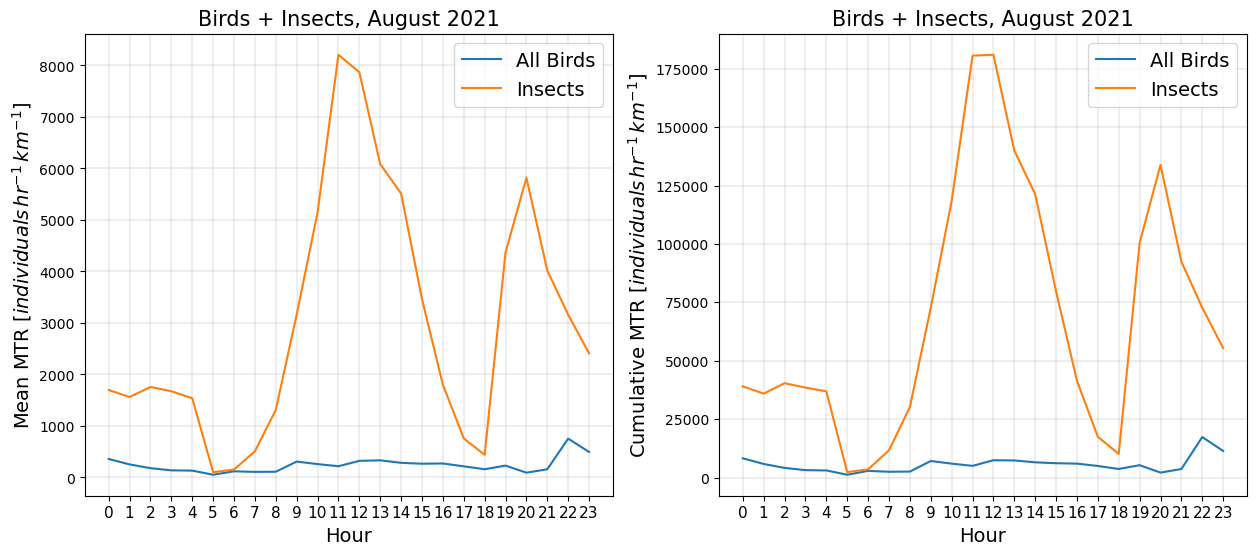

In [50]:
plt.figure(figsize=(15,6))

ax = plt.subplot(121)

plt.plot(hour_vec,mtr_avg_b,label='All Birds')
plt.plot(hour_vec,mtr_avg_i,label='Insects')
plt.legend(fontsize=14)

plt.ylabel('Mean MTR [$individuals\/hr^{-1}\/km^{-1}$]', fontsize=14)
plt.xlabel('Hour', fontsize=14)
plt.xticks(hour_vec, fontsize=11)    
#plt.title('{} to {}'.format(df_birds['timeChunkDate'][time_idx_b[0][0]],df_birds['timeChunkDate'][time_idx_b[0][-1]]), fontsize= 15)
plt.title('Birds + Insects, August 2021', fontsize = 15)
plt.grid(linewidth=0.3)

ax = plt.subplot(122)

plt.plot(hour_vec,mtr_tot_b,label='All Birds')
plt.plot(hour_vec,mtr_tot_i,label='Insects')
plt.legend(fontsize=14)

plt.ylabel('Cumulative MTR [$individuals\/hr^{-1}\/km^{-1}$]', fontsize=14)
plt.xlabel('Hour', fontsize=14)
plt.xticks(hour_vec, fontsize=11)    
#plt.title('{} to {}'.format(df_birds['timeChunkDate'][time_idx_b[0][0]],df_birds['timeChunkDate'][time_idx_b[0][-1]]), fontsize= 15)
plt.title('Birds + Insects, August 2021', fontsize = 15)

plt.grid(linewidth=0.3)
#OUT_PATH = '/home/leo/Dropbox/UvA/Birdscan/Plots/'
#plt.savefig(OUT_PATH + 'MTR_vs_hours_202108.png', facecolor='white')

### Plot MTR versus (local) hour of the day
#### All bird classes

<>:15: SyntaxWarning: invalid escape sequence '\/'
<>:34: SyntaxWarning: invalid escape sequence '\/'
<>:15: SyntaxWarning: invalid escape sequence '\/'
<>:34: SyntaxWarning: invalid escape sequence '\/'
C:\Users\leona\AppData\Local\Temp\ipykernel_10156\1560240878.py:15: SyntaxWarning: invalid escape sequence '\/'
  plt.ylabel('Mean MTR [$individuals\/hr^{-1}\/km^{-1}$]', fontsize=14)
C:\Users\leona\AppData\Local\Temp\ipykernel_10156\1560240878.py:34: SyntaxWarning: invalid escape sequence '\/'
  plt.ylabel('Cumulative MTR [$individuals\/hr^{-1}\/km^{-1}$]', fontsize=14)


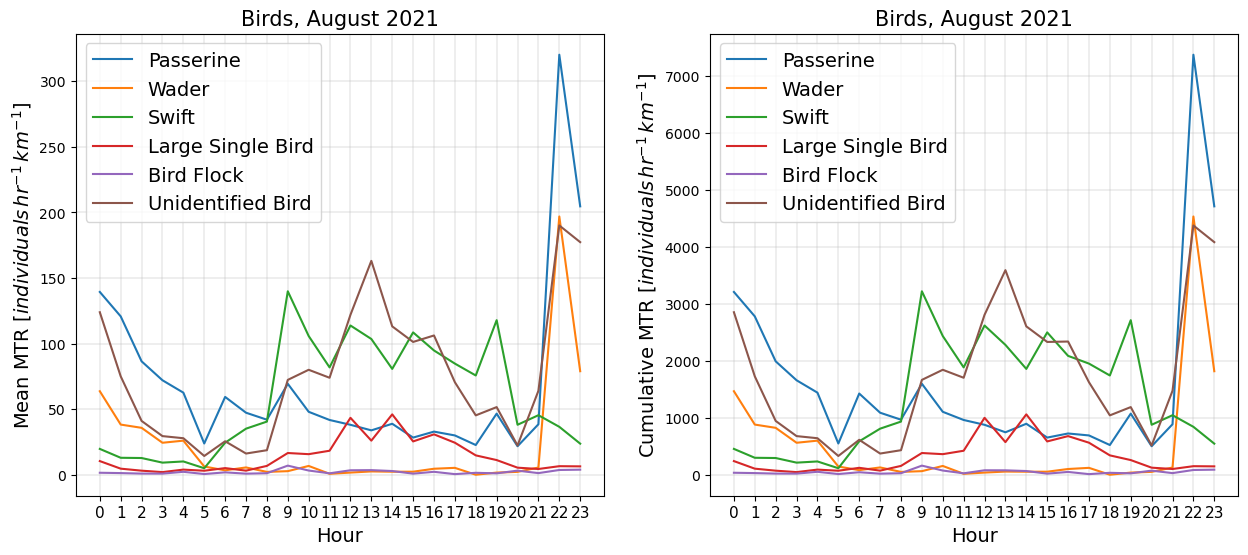

In [54]:
plt.figure(figsize=(15,6))

ax = plt.subplot(121)

#plt.plot(hour_vec,mtr_avg_b,label='All Birds')
plt.plot(hour_vec,mtr_avg_pass,label='Passerine')
plt.plot(hour_vec,mtr_avg_wader,label='Wader')
plt.plot(hour_vec,mtr_avg_swift,label='Swift')
plt.plot(hour_vec,mtr_avg_large,label='Large Single Bird')
plt.plot(hour_vec,mtr_avg_flock,label='Bird Flock')
plt.plot(hour_vec,mtr_avg_unid,label='Unidentified Bird')
#plt.plot(hour_vec,mtr_avg_i,label='Insects')
plt.legend(fontsize=14)

plt.ylabel('Mean MTR [$individuals\/hr^{-1}\/km^{-1}$]', fontsize=14)
plt.xlabel('Hour', fontsize=14)
plt.xticks(hour_vec, fontsize=11)    
#plt.title('{} to {}'.format(df_birds['timeChunkDate'][time_idx_b[0][0]],df_birds['timeChunkDate'][time_idx_b[0][-1]]), fontsize= 15)
plt.title('Birds, August 2021', fontsize = 15)
plt.grid(linewidth=0.3)

ax = plt.subplot(122)

#plt.plot(hour_vec,mtr_tot_b,label='All Birds')
plt.plot(hour_vec,mtr_tot_pass,label='Passerine')
plt.plot(hour_vec,mtr_tot_wader,label='Wader')
plt.plot(hour_vec,mtr_tot_swift,label='Swift')
plt.plot(hour_vec,mtr_tot_large,label='Large Single Bird')
plt.plot(hour_vec,mtr_tot_flock,label='Bird Flock')
plt.plot(hour_vec,mtr_tot_unid,label='Unidentified Bird')
#plt.plot(hour_vec,mtr_tot_i,label='Insects')
plt.legend(fontsize=14)

plt.ylabel('Cumulative MTR [$individuals\/hr^{-1}\/km^{-1}$]', fontsize=14)
plt.xlabel('Hour', fontsize=14)
plt.xticks(hour_vec, fontsize=11)    
#plt.title('{} to {}'.format(df_birds['timeChunkDate'][time_idx_b[0][0]],df_birds['timeChunkDate'][time_idx_b[0][-1]]), fontsize= 15)
plt.title('Birds, August 2021', fontsize = 15)

plt.grid(linewidth=0.3)
#OUT_PATH = '/home/leo/Dropbox/UvA/Birdscan/Plots/'
#plt.savefig(OUT_PATH + 'MTR_vs_hours_202108_bird_types.png', facecolor='white')

### 2) Analysis of Altitude, Ground Speed, and Direction of Flight

### Open the 'csv' file previosly obtained from pgAdmin
#### I made a query for alitude, speed, direction, etc. No need to calculate MTR here

In [59]:
### Open file and print it to the screen 
CSV_PATH = "./Data/" #path to csv file which stores info extracted from database
file_name = CSV_PATH + 'data_20210907.csv'
print(file_name)

data = pd.read_csv(file_name)
data.head()

./Data/data_20210907.csv


,echoid,time_stamp,time_bin,time_bin_start,time_bin_stop,class_prob,class_name,class_no,percent_blind_time,pulsetype,mtr_fact,altitude,azimuth,speed,wing_beat_frequency,rcs
0,echo2500_0000201011,2021-03-11 00:01:58,78657,2021-03-11 00:00:00,2021-03-11 00:05:00,0.565,nonbio,0,72.7048,S,9.75378,107.4,NaN,0.0,0.00000,0.000086
1,echo2500_0000201012,2021-03-11 00:02:11,78657,2021-03-11 00:00:00,2021-03-11 00:05:00,0.525,nonbio,0,72.7048,S,13.95260,107.4,NaN,0.0,0.00000,0.000138
2,echo2500_0000201015,2021-03-11 00:18:31,78660,2021-03-11 00:15:00,2021-03-11 00:20:00,0.615,nonbio,0,69.1148,S,12.50410,95.4,NaN,0.0,2.22699,0.000067
3,echo2500_0000201016,2021-03-11 00:18:42,78660,2021-03-11 00:15:00,2021-03-11 00:20:00,0.400,nonbio,0,69.1148,S,12.40610,87.9,NaN,0.0,2.21790,0.000054
4,echo2500_0000201017,2021-03-11 00:20:18,78661,2021-03-11 00:20:00,2021-03-11 00:25:00,0.585,nonbio,0,0.0000,S,13.29890,93.9,NaN,0.0,0.00000,0.000085


#### Read the variables

In [63]:
time_start = data['time_bin_start']
time_stop = data['time_bin_stop']
time_stamp = data['time_stamp']
mtr_fact = data['mtr_fact']
pulse = data['pulsetype']
class_no = data['class_no']
class_name = data['class_name']
altitude = data['altitude']
perc_blind_time = data['percent_blind_time']
speed = data['speed']
direction = data['azimuth']
class_prob = data['class_prob']

In [65]:
### Datetime veriables
time_ini = datetime.strptime(time_start[0], '%Y-%m-%d %H:%M:%S')
print('start:            ', time_ini)
time_end = datetime.strptime(time_stop[len(time_stop)-1], '%Y-%m-%d %H:%M:%S')
print('end:              ', time_end)

#create my datetime list
date_list = np.arange(time_ini, time_end, timedelta(hours=12))
print('lenght date list: ', len(date_list))


time_stamp_n = np.copy(time_stamp)
time_stamp_n[:] = np.nan
time_stamp_hour = np.copy(time_stamp)
time_stamp_hour[:] = np.nan

for i in np.arange(0,len(time_stamp)):
    
    time_stamp_n[i] = datetime.strptime(time_stamp[i], '%Y-%m-%d %H:%M:%S')
    time_stamp_hour[i] = time_stamp_n[i].hour

start:             2021-03-11 00:00:00
end:               2021-09-01 00:00:00
lenght date list:  348


### Choose time interval (e.g., April 2021)

In [69]:
### Note that here I calculate the local time manually. 
### For each month I listed the sunrise and sunset times, and the UTC offset. 
### Source: https://www.timeanddate.com/sun/netherlands/amsterdam 

ref_date_1 = datetime(2021,8,1,0,0,0)
ref_date_2 = datetime(2021,8,31,23,0,0)
mmonth = 'April' 
sunrise = 6-2
sunset  = 21-2
#March: 7-19 (-1)
#April: 6-21 (-2)
#May:   6-22 (2) 
#June:  5-22 (-2)
#July:  5-22 (-2)
#August 6-21 (-2)

### Filter data based on
- pulse type
- echo type (passerine, wader, swift, large single bird, flock, unidentified bird, insect)
- probability of classification
- percentage of blind time
- date and time
- day/night

In [72]:
### Create filters
filter_b_D = np.all([pulse == 'S',
                     class_no>=3,
                     class_no<=11,
                     class_prob>=0.3,
                     perc_blind_time<80,
                     speed<50,
                     speed>0,
                     time_stamp_n>=ref_date_1,
                     time_stamp_n<=ref_date_2,
                     time_stamp_hour>=sunrise,
                     time_stamp_hour<sunset,
                    ],axis=0)

filter_pass_D = np.all([pulse == 'S',
                     class_no==4,
                     class_prob>=0.3,
                     perc_blind_time<80,
                     speed<50,
                     speed>0,
                     time_stamp_n>=ref_date_1,
                     time_stamp_n<=ref_date_2,
                     time_stamp_hour>=sunrise,
                     time_stamp_hour<sunset,
                    ],axis=0)

filter_wader_D = np.all([pulse == 'S',
                     class_no==5,
                     class_prob>=0.3,
                     perc_blind_time<80,
                     speed<50,
                     speed>0,
                     time_stamp_n>=ref_date_1,
                     time_stamp_n<=ref_date_2,
                     time_stamp_hour>=sunrise,
                     time_stamp_hour<sunset,
                    ],axis=0)

filter_swift_D = np.all([pulse == 'S',
                     class_no==6,
                     class_prob>=0.3,
                     perc_blind_time<80,
                     speed<50,
                     speed>0,
                     time_stamp_n>=ref_date_1,
                     time_stamp_n<=ref_date_2,
                     time_stamp_hour>=sunrise,
                     time_stamp_hour<sunset,
                    ],axis=0)

filter_large_D = np.all([pulse == 'S',
                     class_no==7,
                     class_prob>=0.3,
                     perc_blind_time<80,
                     speed<50,
                     speed>0,
                     time_stamp_n>=ref_date_1,
                     time_stamp_n<=ref_date_2,
                     time_stamp_hour>=sunrise,
                     time_stamp_hour<sunset,
                    ],axis=0)

filter_flock_D = np.all([pulse == 'S',
                     class_no==9,
                     class_prob>=0.3,
                     perc_blind_time<80,
                     speed<50,
                     speed>0,
                     time_stamp_n>=ref_date_1,
                     time_stamp_n<=ref_date_2,
                     time_stamp_hour>=sunrise,
                     time_stamp_hour<sunset,
                    ],axis=0)

filter_unid_D = np.all([pulse == 'S',
                     class_no>=9,
                     class_no<=11,   
                     class_prob>=0.3,
                     perc_blind_time<80,
                     speed<50,
                     speed>0,
                     time_stamp_n>=ref_date_1,
                     time_stamp_n<=ref_date_2,
                     time_stamp_hour>=7-2,
                     time_stamp_hour<20-2,
                    ],axis=0)

filter_i_D = np.all([pulse == 'S',
                     class_no==1,   
                     class_prob>=0.3,
                     perc_blind_time<80,
                     speed<50,
                     speed>0,
                     time_stamp_n>=ref_date_1,
                     time_stamp_n<=ref_date_2,
                     time_stamp_hour>=sunrise,
                     time_stamp_hour<sunset,
                    ],axis=0)

filter_b_N = np.all([pulse == 'S',
                     class_no>=3,
                     class_no<=11,
                     class_prob>=0.3,
                     perc_blind_time<80,
                     speed<50,
                     speed>0,
                     time_stamp_n>=ref_date_1,
                     time_stamp_n<=ref_date_2,
                     np.any([time_stamp_hour<sunrise,time_stamp_hour>=sunset],axis=0),
                    ],axis=0)

filter_pass_N = np.all([pulse == 'S',
                     class_no==4,
                     class_prob>=0.3,
                     perc_blind_time<80,
                     speed<50,
                     speed>0,
                     time_stamp_n>=ref_date_1,
                     time_stamp_n<=ref_date_2,
                     np.any([time_stamp_hour<sunrise,time_stamp_hour>=sunset],axis=0),
                    ],axis=0)

filter_wader_N = np.all([pulse == 'S',
                     class_no==5,
                     class_prob>=0.3,
                     perc_blind_time<80,
                     speed<50,
                     speed>0,
                     time_stamp_n>=ref_date_1,
                     time_stamp_n<=ref_date_2,
                     np.any([time_stamp_hour<sunrise,time_stamp_hour>=sunset],axis=0),
                    ],axis=0)

filter_swift_N = np.all([pulse == 'S',
                     class_no==6,
                     class_prob>=0.3,
                     perc_blind_time<80,
                     speed<50,
                     speed>0,
                     time_stamp_n>=ref_date_1,
                     time_stamp_n<=ref_date_2,
                     np.any([time_stamp_hour<sunrise,time_stamp_hour>=sunset],axis=0),
                    ],axis=0)

filter_large_N = np.all([pulse == 'S',
                     class_no==7,
                     class_prob>=0.3,
                     perc_blind_time<80,
                     speed<50,
                     speed>0,
                     time_stamp_n>=ref_date_1,
                     time_stamp_n<=ref_date_2,
                     np.any([time_stamp_hour<sunrise,time_stamp_hour>=sunset],axis=0),
                    ],axis=0)

filter_flock_N = np.all([pulse == 'S',
                     class_no==9,
                     class_prob>=0.3,
                     perc_blind_time<80,
                     speed<50,
                     speed>0,
                     time_stamp_n>=ref_date_1,
                     time_stamp_n<=ref_date_2,
                     np.any([time_stamp_hour<sunrise,time_stamp_hour>=sunset],axis=0),
                    ],axis=0)

filter_unid_N = np.all([pulse == 'S',
                     class_no>=9,
                     class_no<=11,   
                     class_prob>=0.3,
                     perc_blind_time<80,
                     speed<50,
                     speed>0,
                     time_stamp_n>=ref_date_1,
                     time_stamp_n<=ref_date_2,
                     np.any([time_stamp_hour<sunrise,time_stamp_hour>=sunset],axis=0),
                    ],axis=0)

filter_i_N = np.all([pulse == 'S',
                     class_no==1,   
                     class_prob>=0.3,
                     perc_blind_time<80,
                     speed<50,
                     speed>0,
                     time_stamp_n>=ref_date_1,
                     time_stamp_n<=ref_date_2,
                     np.any([time_stamp_hour<sunrise,time_stamp_hour>=sunset],axis=0),
                    ],axis=0)

### Plot distributions of Altitude and Ground Speed for filtered data

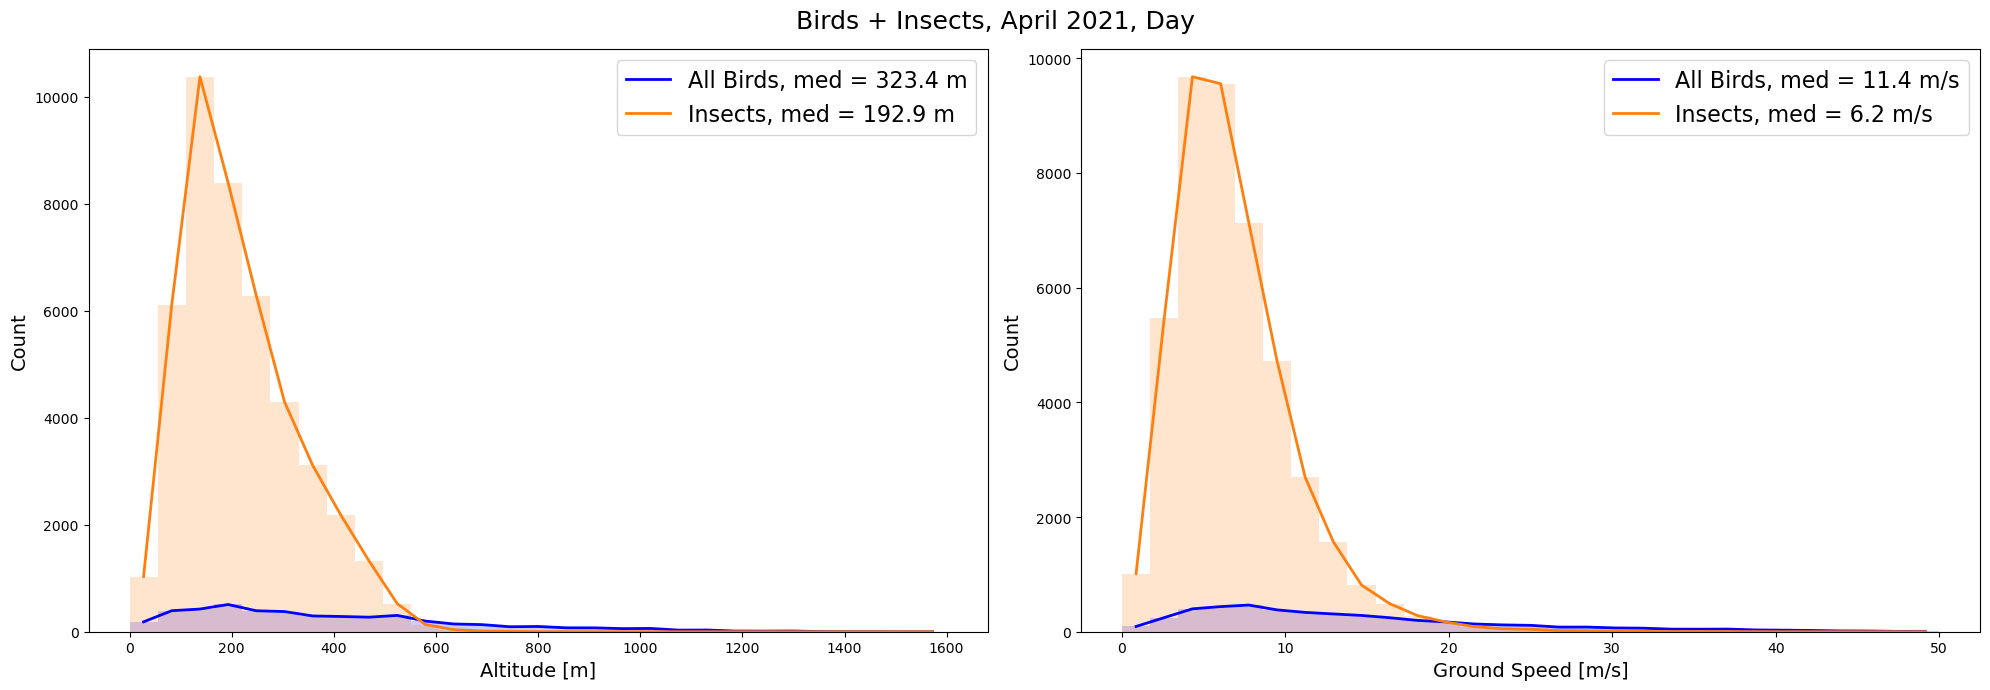

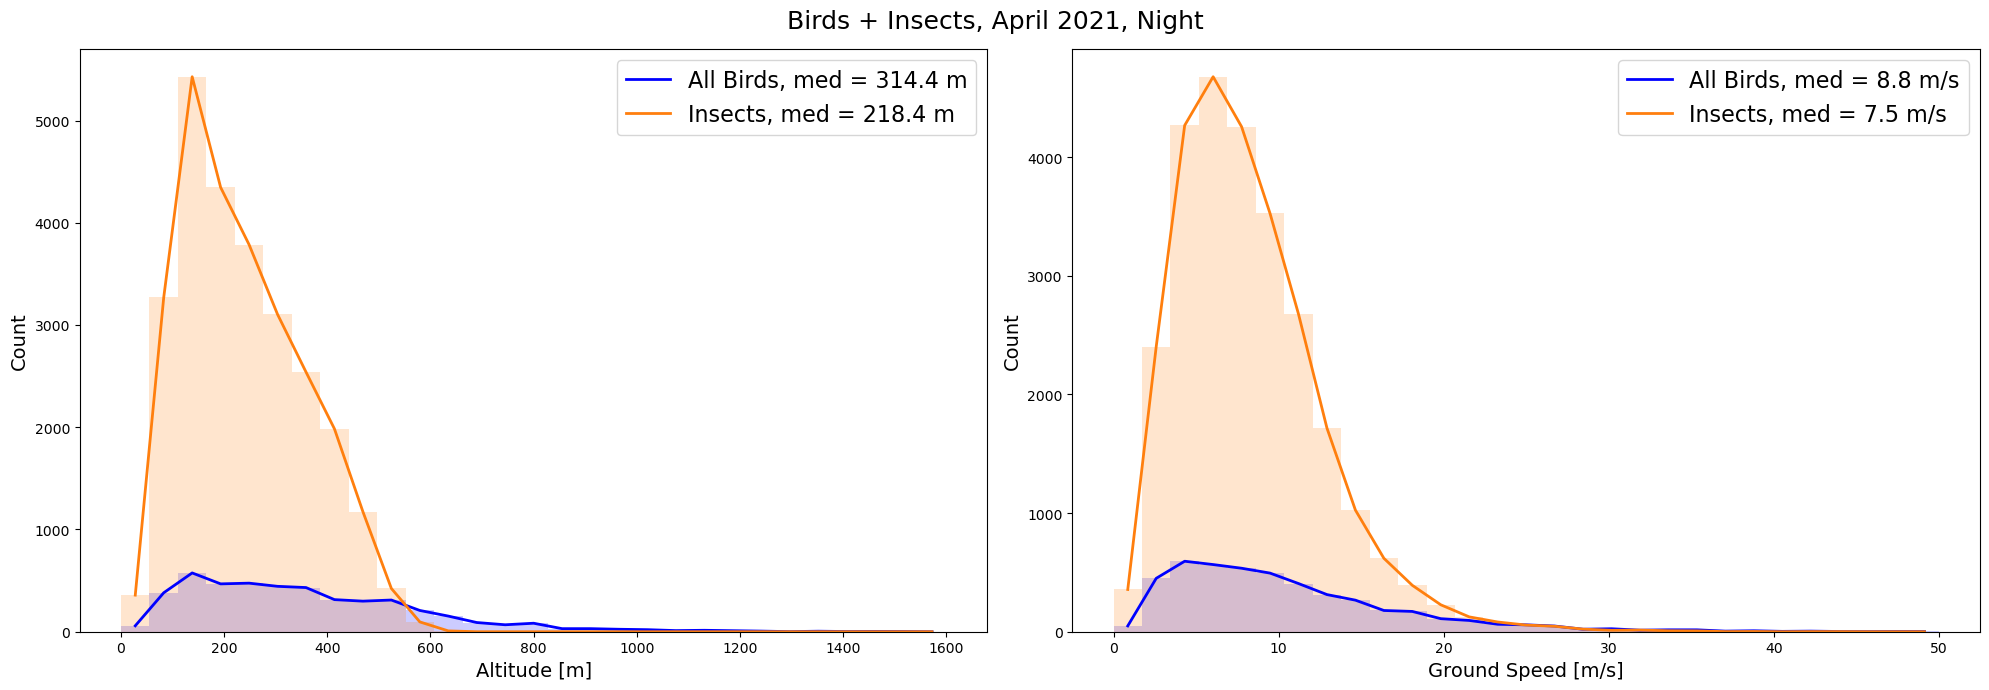

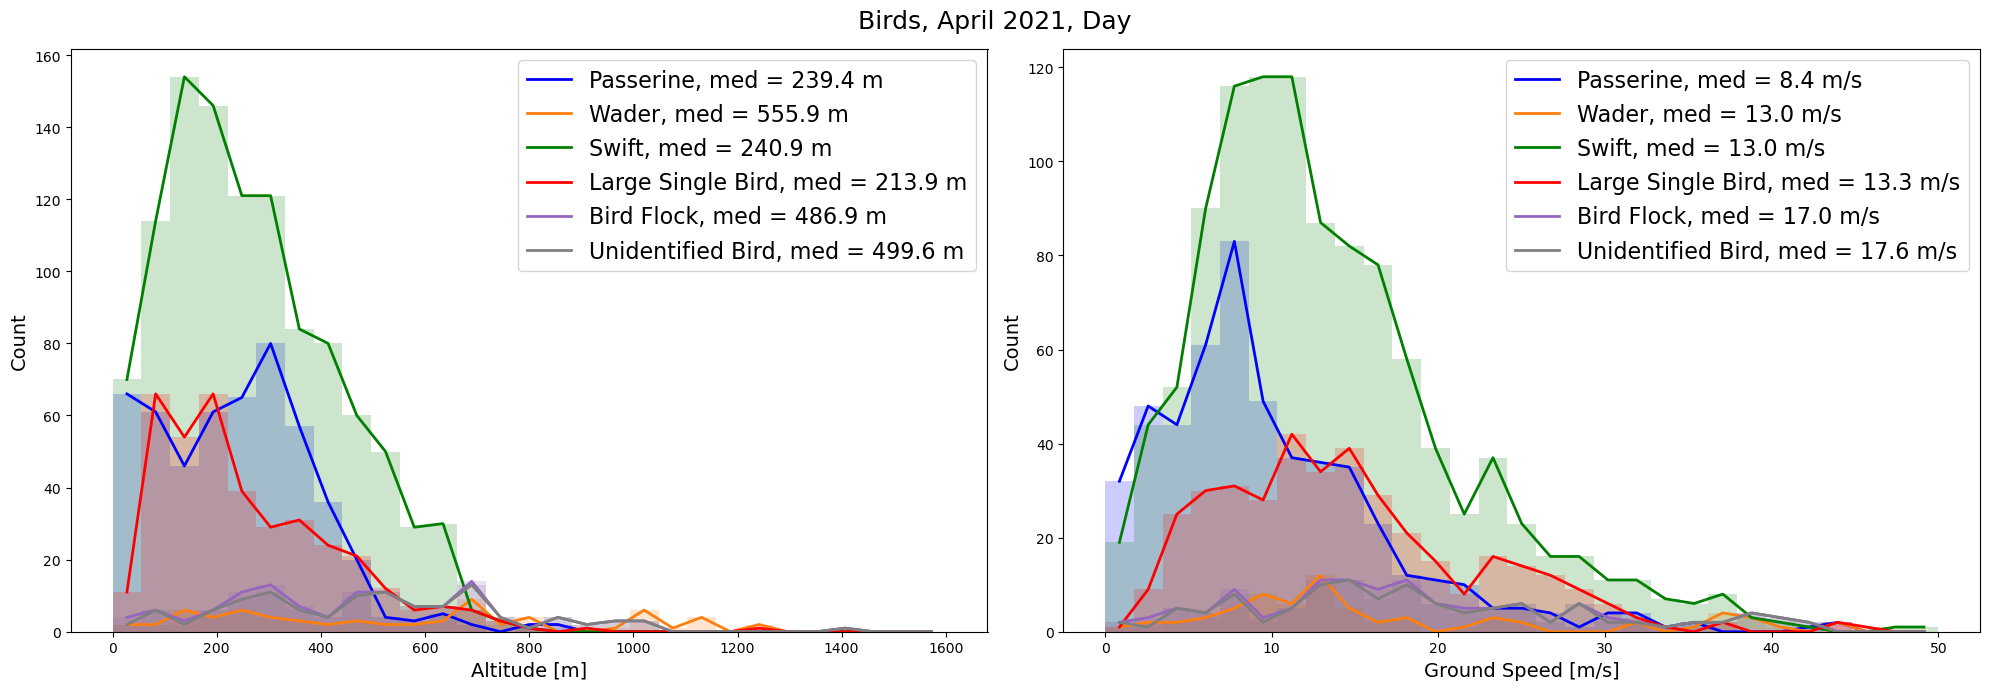

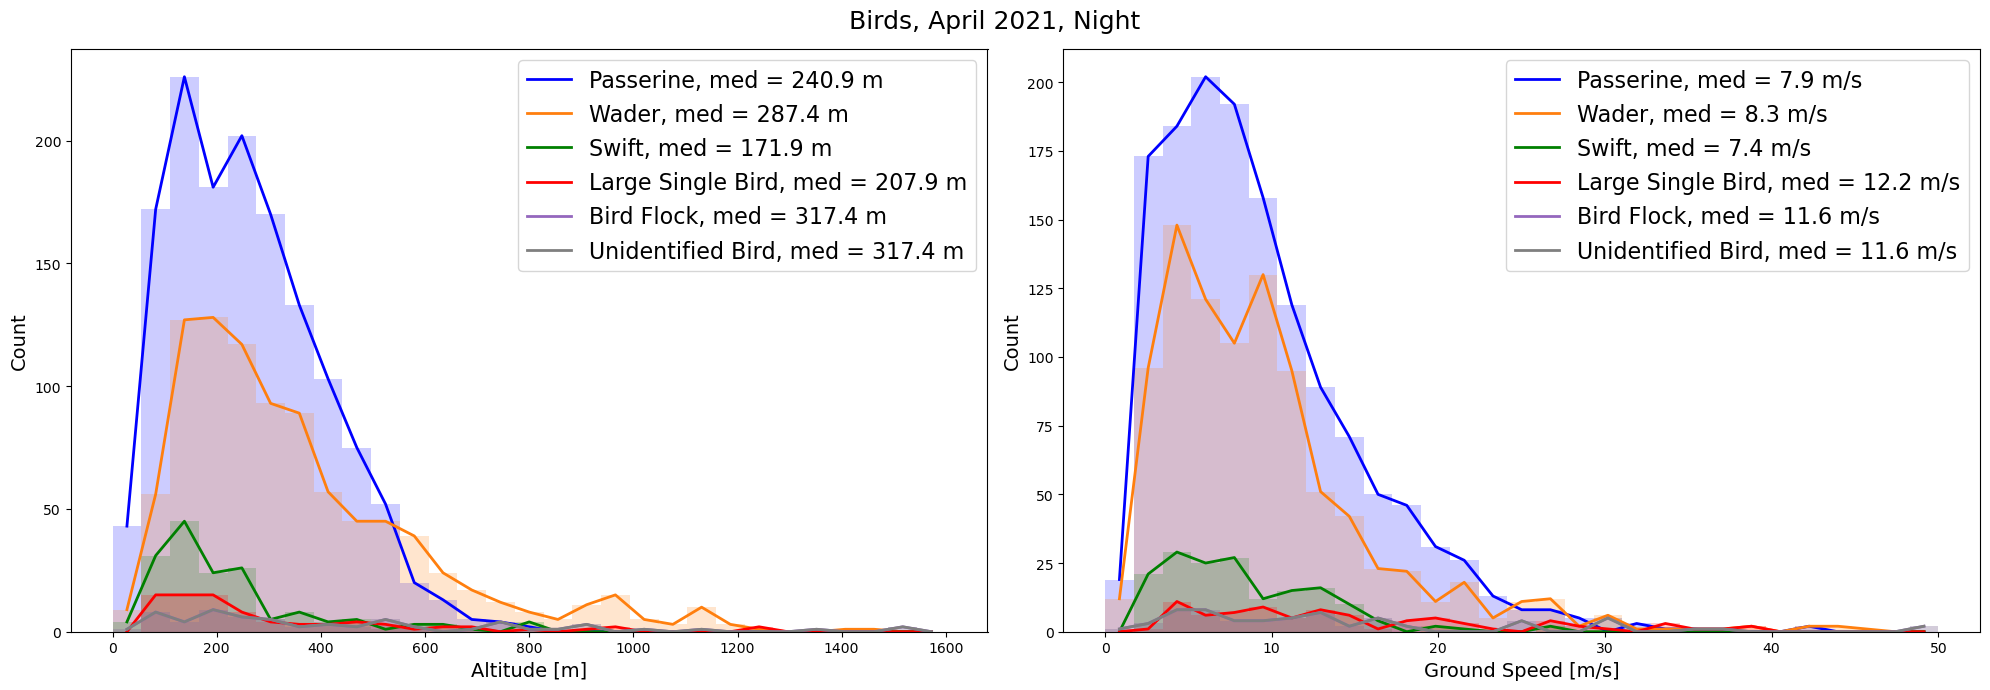

In [76]:
plt.figure(figsize=(20,7))

### 1) Birds + Insects, Altitude, Day
bins = np.linspace(0,1600,30)
bins2 = np.zeros((len(bins)-1,1))
for i in np.arange(0,len(bins)-1):
    bins2[i] = (bins[i+1] + bins[i])/2
    
ax = plt.subplot(121)
hb = ax.hist(altitude[filter_b_D],bins,alpha=0.2,color='b')
ax.plot(bins2,hb[0],color='b',linewidth=2,label='All Birds, med = {:.1f} m'.format(np.nanmedian(altitude[filter_b_D])))
hi = ax.hist(altitude[filter_i_D],bins,alpha=0.2,color='tab:orange')
ax.plot(bins2,hi[0],color='tab:orange',linewidth=2,label='Insects, med = {:.1f} m'.format(np.nanmedian(altitude[filter_i_D])))

plt.xlabel('Altitude [m]', fontsize=14)
plt.ylabel('Count', fontsize=14)
plt.suptitle('Birds + Insects, {} 2021, Day'.format(mmonth), fontsize = 18)
plt.legend(fontsize=16)

### 2) Birds + Insects, Ground Speed, Day
bins = np.linspace(0,50,30)
bins2 = np.zeros((len(bins)-1,1))
for i in np.arange(0,len(bins)-1):
    bins2[i] = (bins[i+1] + bins[i])/2
    
ax = plt.subplot(122)
hb = ax.hist(speed[filter_b_D],bins,alpha=0.2,color='b')
ax.plot(bins2,hb[0],color='b',linewidth=2,label='All Birds, med = {:.1f} m/s'.format(np.nanmedian(speed[filter_b_D])))
hi = ax.hist(speed[filter_i_D],bins,alpha=0.2,color='tab:orange')
ax.plot(bins2,hi[0],color='tab:orange',linewidth=2,label='Insects, med = {:.1f} m/s'.format(np.nanmedian(speed[filter_i_D])))
plt.legend(fontsize=16)

plt.xlabel('Ground Speed [m/s]', fontsize=14)
plt.ylabel('Count', fontsize=14)

OUT_PATH = '/home/leo/Dropbox/UvA/Birdscan/Plots/'
plt.tight_layout()
#plt.savefig(OUT_PATH + 'alt_speed_birds+insects_2021_{}_day.png'.format(mmonth))


plt.figure(figsize=(20,7))

### 3) Birds + Insects, Altitude, Night
bins = np.linspace(0,1600,30)
bins2 = np.zeros((len(bins)-1,1))
for i in np.arange(0,len(bins)-1):
    bins2[i] = (bins[i+1] + bins[i])/2
    
ax = plt.subplot(121)
hb = plt.hist(altitude[filter_b_N],bins,alpha=0.2,color='b')
ax.plot(bins2,hb[0],color='b',linewidth=2,label='All Birds, med = {:.1f} m'.format(np.nanmedian(altitude[filter_b_N])))
hi = plt.hist(altitude[filter_i_N],bins,alpha=0.2,color='tab:orange')
ax.plot(bins2,hi[0],color='tab:orange',linewidth=2,label='Insects, med = {:.1f} m'.format(np.nanmedian(altitude[filter_i_N])))
plt.legend(fontsize=16)
plt.xlabel('Altitude [m]', fontsize=14)
plt.ylabel('Count', fontsize=14)
plt.suptitle('Birds + Insects, {} 2021, Night'.format(mmonth), fontsize = 18)
plt.legend(fontsize=16)

### 4) Birds + Insects, Ground Speed, Night
bins = np.linspace(0,50,30)
bins2 = np.zeros((len(bins)-1,1))
for i in np.arange(0,len(bins)-1):
    bins2[i] = (bins[i+1] + bins[i])/2
    
ax = plt.subplot(122)
hb = plt.hist(speed[filter_b_N],bins,alpha=0.2,color='b')
ax.plot(bins2,hb[0],color='b',linewidth=2,label='All Birds, med = {:.1f} m/s'.format(np.nanmedian(speed[filter_b_N])))
hi = plt.hist(speed[filter_i_N],bins,alpha=0.2,color='tab:orange')
ax.plot(bins2,hi[0],color='tab:orange',linewidth=2,label='Insects, med = {:.1f} m/s'.format(np.nanmedian(speed[filter_i_N])))
plt.xlabel('Ground Speed [m/s]',fontsize=14)
plt.ylabel('Count', fontsize=14)
plt.legend(fontsize=16)

plt.tight_layout()
#plt.savefig(OUT_PATH + 'alt_speed_birds+insects_2021_{}_night.png'.format(mmonth))


plt.figure(figsize=(20,7))

### 5) Bird Classes, Altitude, Day
bins = np.linspace(0,1600,30)
bins2 = np.zeros((len(bins)-1,1))
for i in np.arange(0,len(bins)-1):
    bins2[i] = (bins[i+1] + bins[i])/2
    
ax = plt.subplot(121)
h_pass = plt.hist(altitude[filter_pass_D],bins,alpha=0.2,color='b')
ax.plot(bins2,h_pass[0],color='b',linewidth=2,label='Passerine, med = {:.1f} m'.format(np.nanmedian(altitude[filter_pass_D])))
h_wader = plt.hist(altitude[filter_wader_D],bins,alpha=0.2,color='tab:orange')
ax.plot(bins2,h_wader[0],color='tab:orange',linewidth=2,label='Wader, med = {:.1f} m'.format(np.nanmedian(altitude[filter_wader_D])))
h_swift = plt.hist(altitude[filter_swift_D],bins,alpha=0.2,color='g')
ax.plot(bins2,h_swift[0],color='g',linewidth=2,label='Swift, med = {:.1f} m'.format(np.nanmedian(altitude[filter_swift_D])))
h_large = plt.hist(altitude[filter_large_D],bins,alpha=0.2,color='r')
ax.plot(bins2,h_large[0],color='r',linewidth=2,label='Large Single Bird, med = {:.1f} m'.format(np.nanmedian(altitude[filter_large_D])))
h_flock = plt.hist(altitude[filter_flock_D],bins,alpha=0.2,color='tab:purple')
ax.plot(bins2,h_flock[0],color='tab:purple',linewidth=2,label='Bird Flock, med = {:.1f} m'.format(np.nanmedian(altitude[filter_flock_D])))
h_unid = plt.hist(altitude[filter_unid_D],bins,alpha=0.2,color='tab:grey')
ax.plot(bins2,h_unid[0],color='tab:grey',linewidth=2,label='Unidentified Bird, med = {:.1f} m'.format(np.nanmedian(altitude[filter_unid_D])))
plt.xlabel('Altitude [m]', fontsize=14)
plt.ylabel('Count', fontsize=14)
plt.suptitle('Birds, {} 2021, Day'.format(mmonth), fontsize = 18)
plt.legend(fontsize=16)

### 6) Birds Classes, Ground Speed, Day
bins = np.linspace(0,50,30)
bins2 = np.zeros((len(bins)-1,1))
for i in np.arange(0,len(bins)-1):
    bins2[i] = (bins[i+1] + bins[i])/2
    
ax = plt.subplot(122)
h_pass = plt.hist(speed[filter_pass_D],bins,alpha=0.2,color='b')
ax.plot(bins2,h_pass[0],color='b',linewidth=2,label='Passerine, med = {:.1f} m/s'.format(np.nanmedian(speed[filter_pass_D])))
h_wader = plt.hist(speed[filter_wader_D],bins,alpha=0.2,color='tab:orange')
ax.plot(bins2,h_wader[0],color='tab:orange',linewidth=2,label='Wader, med = {:.1f} m/s'.format(np.nanmedian(speed[filter_wader_D])))
h_swift = plt.hist(speed[filter_swift_D],bins,alpha=0.2,color='g')
ax.plot(bins2,h_swift[0],color='g',linewidth=2,label='Swift, med = {:.1f} m/s'.format(np.nanmedian(speed[filter_wader_D])))
h_large = plt.hist(speed[filter_large_D],bins,alpha=0.2,color='r')
ax.plot(bins2,h_large[0],color='r',linewidth=2,label='Large Single Bird, med = {:.1f} m/s'.format(np.nanmedian(speed[filter_large_D])))
h_flock = plt.hist(speed[filter_flock_D],bins,alpha=0.2,color='tab:purple')
ax.plot(bins2,h_flock[0],color='tab:purple',linewidth=2,label='Bird Flock, med = {:.1f} m/s'.format(np.nanmedian(speed[filter_flock_D])))
h_unid = plt.hist(speed[filter_unid_D],bins,alpha=0.2,color='tab:grey')
ax.plot(bins2,h_unid[0],color='tab:grey',linewidth=2,label='Unidentified Bird, med = {:.1f} m/s'.format(np.nanmedian(speed[filter_unid_D])))
plt.xlabel('Ground Speed [m/s]', fontsize=14)
plt.ylabel('Count', fontsize=14)
plt.legend(fontsize=16)

plt.tight_layout()
#plt.savefig(OUT_PATH + 'alt_speed_birds_2021_{}_day.png'.format(mmonth))


plt.figure(figsize=(20,7))

### 7) Bird Classes, Altitude, Night
bins = np.linspace(0,1600,30)
bins2 = np.zeros((len(bins)-1,1))
for i in np.arange(0,len(bins)-1):
    bins2[i] = (bins[i+1] + bins[i])/2
    
ax = plt.subplot(121)
h_pass = plt.hist(altitude[filter_pass_N],bins,alpha=0.2,color='b')
ax.plot(bins2,h_pass[0],color='b',linewidth=2,label='Passerine, med = {:.1f} m'.format(np.nanmedian(altitude[filter_pass_N])))
h_wader = plt.hist(altitude[filter_wader_N],bins,alpha=0.2,color='tab:orange')
ax.plot(bins2,h_wader[0],color='tab:orange',linewidth=2,label='Wader, med = {:.1f} m'.format(np.nanmedian(altitude[filter_wader_N])))
h_swift = plt.hist(altitude[filter_swift_N],bins,alpha=0.2,color='g')
ax.plot(bins2,h_swift[0],color='g',linewidth=2,label='Swift, med = {:.1f} m'.format(np.nanmedian(altitude[filter_swift_N])))
h_large = plt.hist(altitude[filter_large_N],bins,alpha=0.2,color='r')
ax.plot(bins2,h_large[0],color='r',linewidth=2,label='Large Single Bird, med = {:.1f} m'.format(np.nanmedian(altitude[filter_large_N])))
h_flock = plt.hist(altitude[filter_flock_N],bins,alpha=0.2,color='tab:purple')
ax.plot(bins2,h_flock[0],color='tab:purple',linewidth=2,label='Bird Flock, med = {:.1f} m'.format(np.nanmedian(altitude[filter_flock_N])))
h_unid = plt.hist(altitude[filter_unid_N],bins,alpha=0.2,color='tab:grey')
ax.plot(bins2,h_unid[0],color='tab:grey',linewidth=2,label='Unidentified Bird, med = {:.1f} m'.format(np.nanmedian(altitude[filter_unid_N])))
plt.xlabel('Altitude [m]', fontsize=14)
plt.ylabel('Count', fontsize=14)
plt.suptitle('Birds, {} 2021, Night'.format(mmonth), fontsize = 18)
plt.legend(fontsize=16)

### 8) Bird Classes, Ground Speed, Night
bins = np.linspace(0,50,30)
bins2 = np.zeros((len(bins)-1,1))
for i in np.arange(0,len(bins)-1):
    bins2[i] = (bins[i+1] + bins[i])/2
    
ax = plt.subplot(122)
h_pass = plt.hist(speed[filter_pass_N],bins,alpha=0.2,color='b')
ax.plot(bins2,h_pass[0],color='b',linewidth=2,label='Passerine, med = {:.1f} m/s'.format(np.nanmedian(speed[filter_pass_N])))
h_wader = plt.hist(speed[filter_wader_N],bins,alpha=0.2,color='tab:orange')
ax.plot(bins2,h_wader[0],color='tab:orange',linewidth=2,label='Wader, med = {:.1f} m/s'.format(np.nanmedian(speed[filter_wader_N])))
h_swift = plt.hist(speed[filter_swift_N],bins,alpha=0.2,color='g')
ax.plot(bins2,h_swift[0],color='g',linewidth=2,label='Swift, med = {:.1f} m/s'.format(np.nanmedian(speed[filter_swift_N])))
h_large = plt.hist(speed[filter_large_N],bins,alpha=0.2,color='r')
ax.plot(bins2,h_large[0],color='r',linewidth=2,label='Large Single Bird, med = {:.1f} m/s'.format(np.nanmedian(speed[filter_large_N])))
h_flock = plt.hist(speed[filter_flock_N],bins,alpha=0.2,color='tab:purple')
ax.plot(bins2,h_flock[0],color='tab:purple',linewidth=2,label='Bird Flock, med = {:.1f} m/s'.format(np.nanmedian(speed[filter_flock_N])))
h_unid = plt.hist(speed[filter_unid_N],bins,alpha=0.2,color='tab:grey')
ax.plot(bins2,h_unid[0],color='tab:grey',linewidth=2,label='Unidentified Bird, med = {:.1f} m/s'.format(np.nanmedian(speed[filter_unid_N])))
plt.xlabel('Ground Speed [m/s]', fontsize=14)
plt.ylabel('Count', fontsize=14)
plt.legend(fontsize=16)

plt.tight_layout()
#plt.savefig(OUT_PATH + 'alt_speed_birds_2021_{}_night.png'.format(mmonth))

### Plot Flight Directions

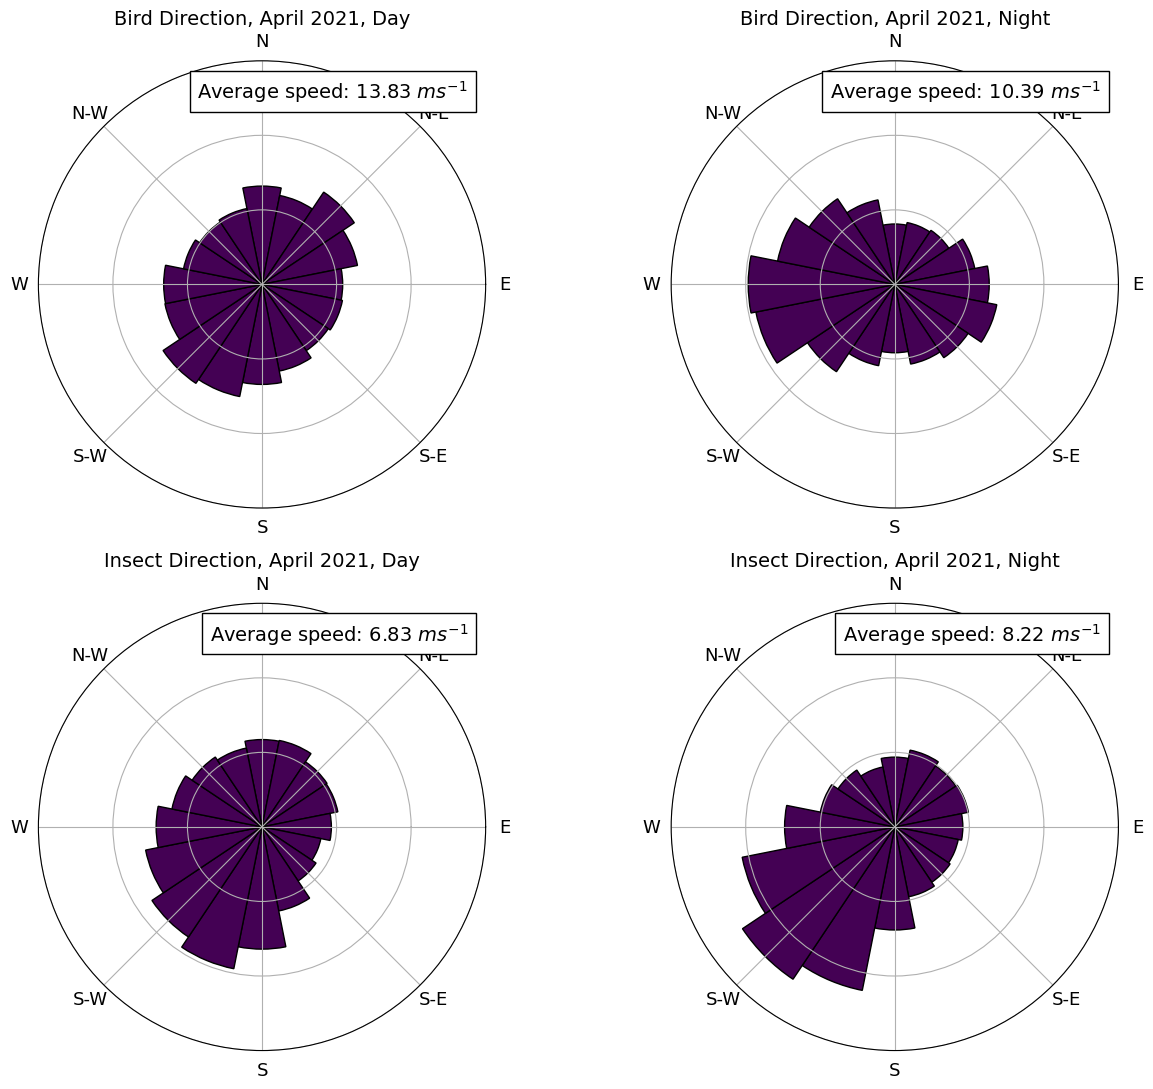

In [80]:
fig = plt.figure(figsize=(13,11))

### 1) All Birds' Direction, Day
ws = speed[filter_b_D]
wd = direction[filter_b_D]
wss=ws[ws>0]
wdd=wd[ws>0]

bins_range = np.arange(0, max(wss), max(wss)) # this sets the legend scale
viridis = plt.get_cmap('viridis')     # change colormap to viridis 

ax1 = fig.add_subplot(221, projection='windrose')
ax1.bar(wdd, wss, normed=True, opening=1, edgecolor='black', bins=bins_range, cmap=viridis)
ax1.set_xticklabels(['E','N-E','N','N-W','W','S-W','S','S-E'], fontsize=13)
ax1.set_yticks(np.arange(0, 16, step=5))
#ax1.set_yticklabels(np.arange(5, 16, step=5))
anchored_text = AnchoredText('Average speed: {:.2f}'.format(np.average(wss)) + ' $ms^{-1}$', loc=1, prop=dict(size=14))
ax1.add_artist(anchored_text)
plt.title('Bird Direction, {} 2021, Day'.format(mmonth), fontsize = 14)


### 2) All Birds' Direction, Night
ws = speed[filter_b_N]
wd = direction[filter_b_N]
wss=ws[ws>0]
wdd=wd[ws>0]

bins_range = np.arange(0, max(wss), max(wss)) # this sets the legend scale
viridis = plt.get_cmap('viridis')     # change colormap to viridis 

ax1 = fig.add_subplot(222, projection='windrose')
ax1.bar(wdd, wss, normed=True, opening=1, edgecolor='black', bins=bins_range, cmap=viridis)
ax1.set_xticklabels(['E','N-E','N','N-W','W','S-W','S','S-E'], fontsize=13)
ax1.set_yticks(np.arange(0, 16, step=5))
#ax1.set_yticklabels(np.arange(5, 16, step=5))
anchored_text = AnchoredText('Average speed: {:.2f}'.format(np.average(wss)) + ' $ms^{-1}$', loc=1, prop=dict(size=14))
ax1.add_artist(anchored_text)
plt.title('Bird Direction, {} 2021, Night'.format(mmonth), fontsize = 14)


### 3) Insects' Dricetion, Day
ws = speed[filter_i_D]
wd = direction[filter_i_D]
wss=ws[ws>0]
wdd=wd[ws>0]

bins_range = np.arange(0, max(wss), max(wss)) # this sets the legend scale
viridis = plt.get_cmap('viridis')     # change colormap to viridis 

ax1 = fig.add_subplot(223, projection='windrose')
ax1.bar(wdd, wss, normed=True, opening=1, edgecolor='black', bins=bins_range, cmap=viridis)
ax1.set_xticklabels(['E','N-E','N','N-W','W','S-W','S','S-E'], fontsize=13)
ax1.set_yticks(np.arange(0, 16, step=5))
#ax1.set_yticklabels(np.arange(5, 16, step=5))
anchored_text = AnchoredText('Average speed: {:.2f}'.format(np.average(wss)) + ' $ms^{-1}$', loc=1, prop=dict(size=14))
ax1.add_artist(anchored_text)
plt.title('Insect Direction, {} 2021, Day'.format(mmonth), fontsize = 14)


### 4) Insects' Direction, Night
ws = speed[filter_i_N]
wd = direction[filter_i_N]
wss=ws[ws>0]
wdd=wd[ws>0]

bins_range = np.arange(0, max(wss), max(wss)) # this sets the legend scale
viridis = plt.get_cmap('viridis')     # change colormap to viridis 

ax1 = fig.add_subplot(224, projection='windrose')
ax1.bar(wdd, wss, normed=True, opening=1, edgecolor='black', bins=bins_range, cmap=viridis)
ax1.set_xticklabels(['E','N-E','N','N-W','W','S-W','S','S-E'], fontsize=13)
ax1.set_yticks(np.arange(0, 16, step=5))
#ax1.set_yticklabels(np.arange(5, 16, step=5))
anchored_text = AnchoredText('Average speed: {:.2f}'.format(np.average(wss)) + ' $ms^{-1}$', loc=1, prop=dict(size=14))
ax1.add_artist(anchored_text)
plt.title('Insect Direction, {} 2021, Night'.format(mmonth), fontsize = 14)

plt.tight_layout()
#plt.savefig(OUT_PATH + 'speed_direction_birds+insects_2021_{}.png'.format(mmonth))

### Temperature vs Insects' MTR

In [83]:
from netCDF4 import Dataset as netcdf_dataset

In [85]:
DATA_PATH = "./Data/"  #path to where ERA5 data are stored
file_nc = DATA_PATH + 'Artis_t2m.nc'

In [87]:
#netcdf_dataset(file_nc).variables

In [89]:
ta = netcdf_dataset(file_nc).variables['t2m'][:]          #2m temperature

In [91]:
### Time in hours since 1/1/1990
hours = netcdf_dataset(file_nc).variables['time'][:]
print(hours)

[1062096 1062097 1062098 ... 1067229 1067230 1067231]


In [93]:
### Convert all hours since 1/1/1990 to datetime
start = datetime(1900,1,1,0,0,0) 
my_dates = []

for i in np.arange(0,len(hours)):
    
    my_hours = int(hours.data[i])
    delta = timedelta(hours=my_hours) 
    offset = start + delta
    #print(offset)
       
    my_dates = np.concatenate((my_dates, offset), axis=None)

print(my_dates)
print(len(my_dates))

[datetime.datetime(2021, 3, 1, 0, 0) datetime.datetime(2021, 3, 1, 1, 0)
 datetime.datetime(2021, 3, 1, 2, 0) ...
 datetime.datetime(2021, 9, 30, 21, 0)
 datetime.datetime(2021, 9, 30, 22, 0)
 datetime.datetime(2021, 9, 30, 23, 0)]
5136


In [95]:
print(df_insects['timeChunkBegin'])
print(len(df_insects['timeChunkBegin']))

0      2021-03-10 23:00:00
1      2021-03-11 00:00:00
2      2021-03-11 01:00:00
3      2021-03-11 02:00:00
4      2021-03-11 03:00:00
               ...        
4171   2021-08-31 18:00:00
4172   2021-08-31 19:00:00
4173   2021-08-31 20:00:00
4174   2021-08-31 21:00:00
4175   2021-08-31 22:00:00
Name: timeChunkBegin, Length: 4176, dtype: datetime64[ns]
4176


* There is a time mismatch between ERA5 file (temperature) and MR1 Analysis Tool file (MTR). So, I need to crop data accordingly.

In [98]:
ref_date_1 = datetime(2021,3,10,23,0,0)
ref_date_2 = datetime(2021,8,31,22,0,0)

time_idx_Artis = np.where(np.all([my_dates>=ref_date_1,my_dates<=ref_date_2],axis=0))

In [100]:
my_dates_new = my_dates[time_idx_Artis]
print(my_dates_new)
print(len(my_dates_new))

[datetime.datetime(2021, 3, 10, 23, 0)
 datetime.datetime(2021, 3, 11, 0, 0) datetime.datetime(2021, 3, 11, 1, 0)
 ... datetime.datetime(2021, 8, 31, 20, 0)
 datetime.datetime(2021, 8, 31, 21, 0)
 datetime.datetime(2021, 8, 31, 22, 0)]
4176


In [102]:
### Define an interval
ref_date_1 = datetime(2021,7,1,0,0,0)
ref_date_2 = datetime(2021,7,31,23,0,0)

time_idx = np.where(np.all([my_dates_new>=ref_date_1,my_dates_new<=ref_date_2],axis=0))
#print(my_dates[time_idx[0]])   

In [104]:
### Make sure to have Temperature
print(ta[time_idx[0],0,:,:])

[[[288.1460629145469 288.03851241242336]
  [288.30981097633867 288.0675801157]]

 [[287.79628155178466 287.61896856179715]
  [287.8374607980933 287.49591528459274]]

 [[287.4600651172182 287.17665501027096]
  [287.4150101771394 286.9407221520089]]

 [[287.3210246032116 287.0652288143772]
  [287.1548542328135 286.72126099227023]]

 [[287.2376971871519 286.95477154192594]
  [287.07588697224526 286.60305233227854]]

 [[287.18973547674545 286.8457676546385]
  [287.0686200464261 286.5919097126892]]

 [[287.2023314814987 286.9135922956173]
  [287.05408619478777 286.62436864801475]]

 [[287.1117371396198 286.81088641070653]
  [287.000310943726 286.5686555500679]]

 [[286.8806488985705 286.48823490433585]
  [286.9063253697982 286.42380149540594]]

 [[287.4169480240245 287.1824685509263]
  [287.4285751053352 287.13547576396235]]

 [[287.39030262935427 287.1756860868284]
  [287.44698465074373 287.13838253429003]]

 [[287.39756955517345 287.141773766339]
  [287.5496905356545 287.2313991847753]]



In [106]:
ta_uno = np.average(ta[:,0,:,:],axis=2)
print(np.shape(ta_uno))
ta_due = np.average(ta_uno[:,:],axis=1)
print(np.shape(ta_due))
ta_tre = ta_due[time_idx_Artis[0]]
ta_A = ta_tre[time_idx[0]]
print(np.shape(ta_A))

ta_AC = ta_A - 273.15

(5136, 2)
(5136,)
(744,)


In [108]:
mtr_insects = df_insects['mtr.insect']
print(np.shape(mtr_insects))

(4176,)


In [110]:
time_idx_d = np.where(np.all([my_dates_new>=ref_date_1,
                              my_dates_new<=ref_date_2,
                              df_insects['dayOrNight']=='day',
                             ],axis=0))

time_idx_n = np.where(np.all([my_dates_new>=ref_date_1,
                              my_dates_new<=ref_date_2,
                              df_insects['dayOrNight']=='night',
                             ],axis=0))

mtr_insects_d = mtr_insects[time_idx_d[0]]
ta_AC_d       = ta_due[time_idx_d[0]] - 273.15

mtr_insects_n = mtr_insects[time_idx_n[0]]
ta_AC_n       = ta_due[time_idx_n[0]] - 273.15

<>:10: SyntaxWarning: invalid escape sequence '\/'
<>:10: SyntaxWarning: invalid escape sequence '\/'
C:\Users\leona\AppData\Local\Temp\ipykernel_10156\2714052998.py:10: SyntaxWarning: invalid escape sequence '\/'
  ax.set_ylabel('MTR [insects$\/$hr$^{-1}$$\/$km$^{-1}$]', color = 'k', fontsize=25)


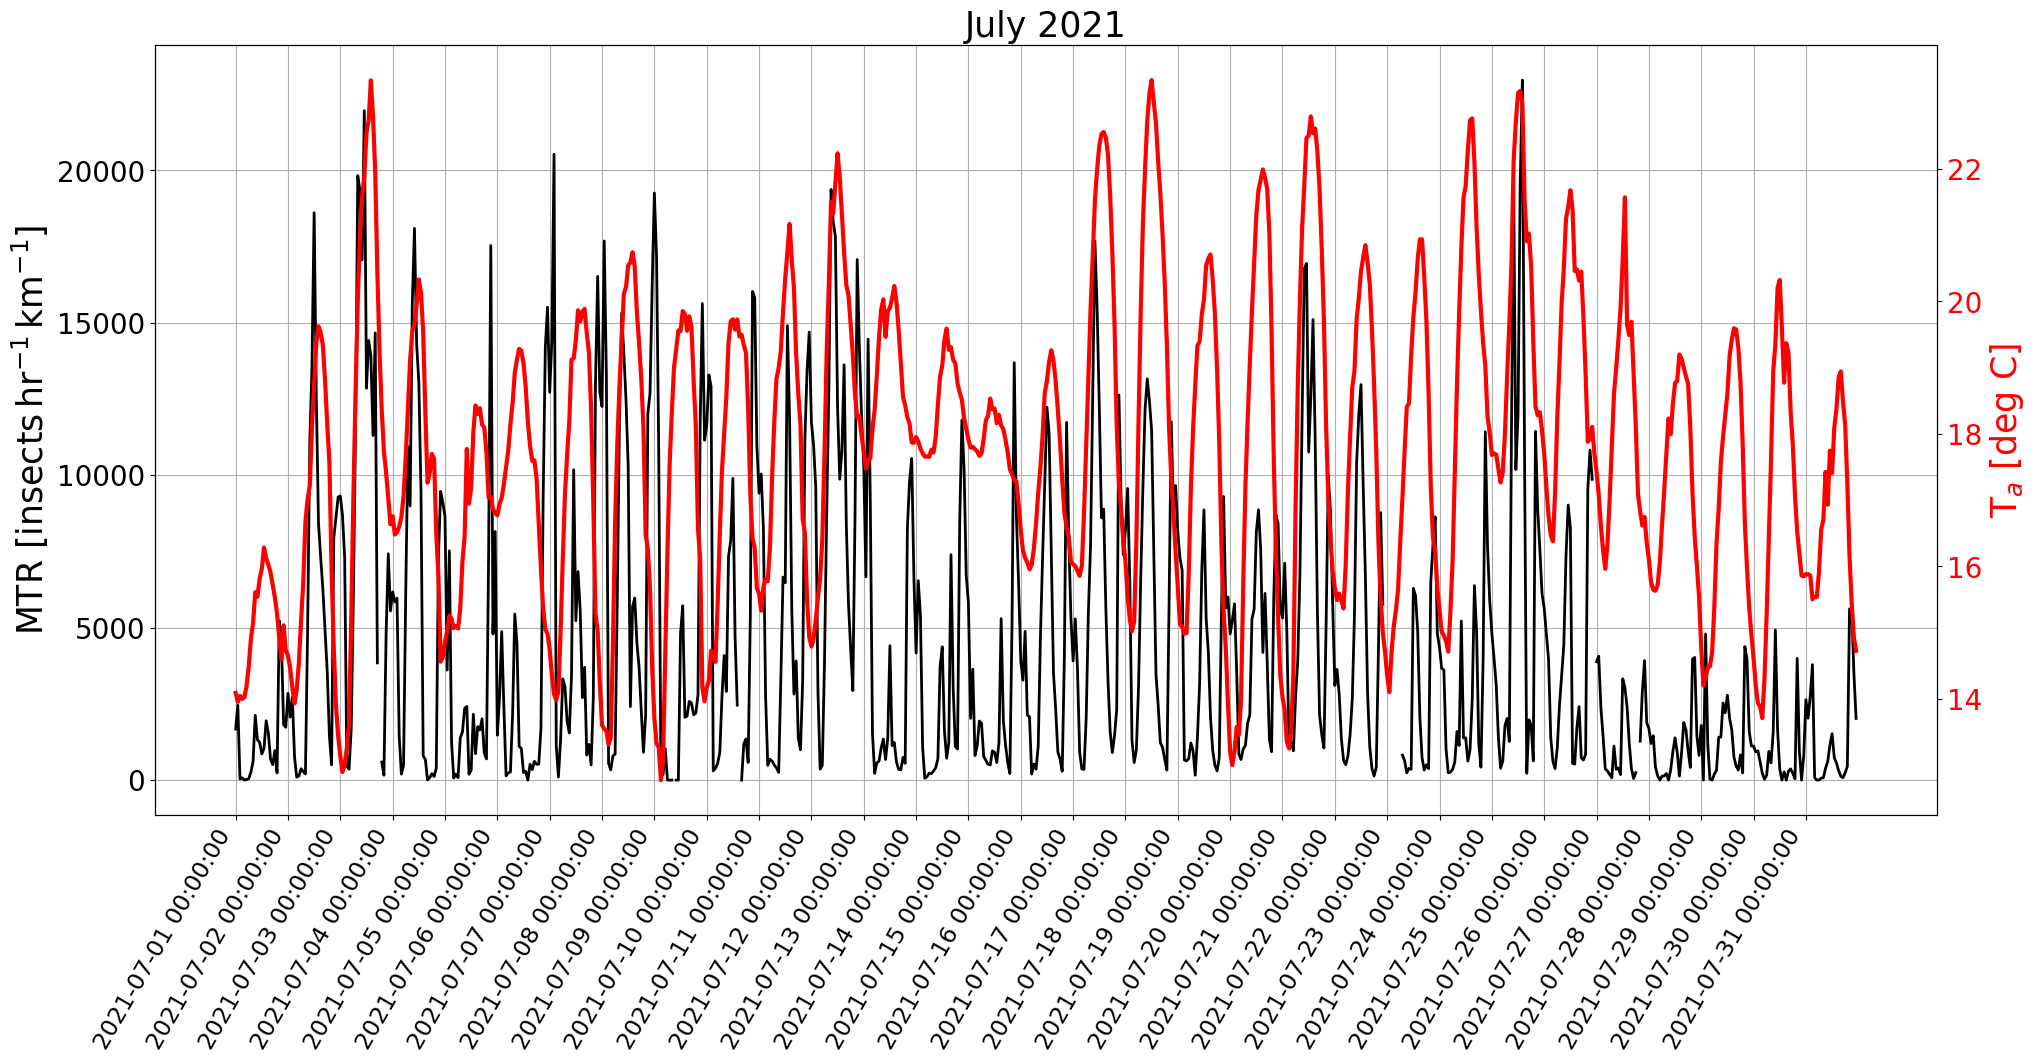

In [112]:
### Plot
plt.figure(figsize=(23,10))

vec = np.arange(len(time_idx[0]))
vec_const = 0*vec

ax = plt.axes()

ax.plot(vec, mtr_insects[time_idx[0]], marker='', linestyle='-', linewidth = 2, color='k') 
ax.set_ylabel('MTR [insects$\/$hr$^{-1}$$\/$km$^{-1}$]', color = 'k', fontsize=25)
ax.set_xlabel('')
ax.set_title('July 2021', fontsize=25)

plt.xticks(vec, fontsize=20)  
plt.yticks(fontsize=20)
plt.grid()
ax.set_xticklabels(my_dates_new[time_idx[0]], rotation=60, ha='right',fontsize=17)
plt.locator_params(axis='x', nbins=len(time_idx[0])/24)

### make a plot with different y-axis using second axis object
ax2=ax.twinx()

ax2.plot(ta_AC,'-',linewidth=3,label='T$_a$',color='r')
ax2.set_ylabel('T$_a$ [deg C]',fontsize=25,color='r')
plt.yticks(fontsize=20, color='r')
#plt.plot(vec,vec_const,'-r', linewidth=0.5)

OUT_PATH = "./Plots/"
#plt.tight_layout()
#plt.savefig(OUT_PATH + 'mtr_ta_time_series_202107.png') #, facecolor='white')

<>:6: SyntaxWarning: invalid escape sequence '\/'
<>:13: SyntaxWarning: invalid escape sequence '\/'
<>:6: SyntaxWarning: invalid escape sequence '\/'
<>:13: SyntaxWarning: invalid escape sequence '\/'
C:\Users\leona\AppData\Local\Temp\ipykernel_10156\2301551737.py:6: SyntaxWarning: invalid escape sequence '\/'
  ax.set_xlabel('MTR [insects$\/$hr$^{-1}$$\/$km$^{-1}$]', fontsize=15)
C:\Users\leona\AppData\Local\Temp\ipykernel_10156\2301551737.py:13: SyntaxWarning: invalid escape sequence '\/'
  ax.set_xlabel('MTR [insects$\/$hr$^{-1}$$\/$km$^{-1}$]', fontsize=15)


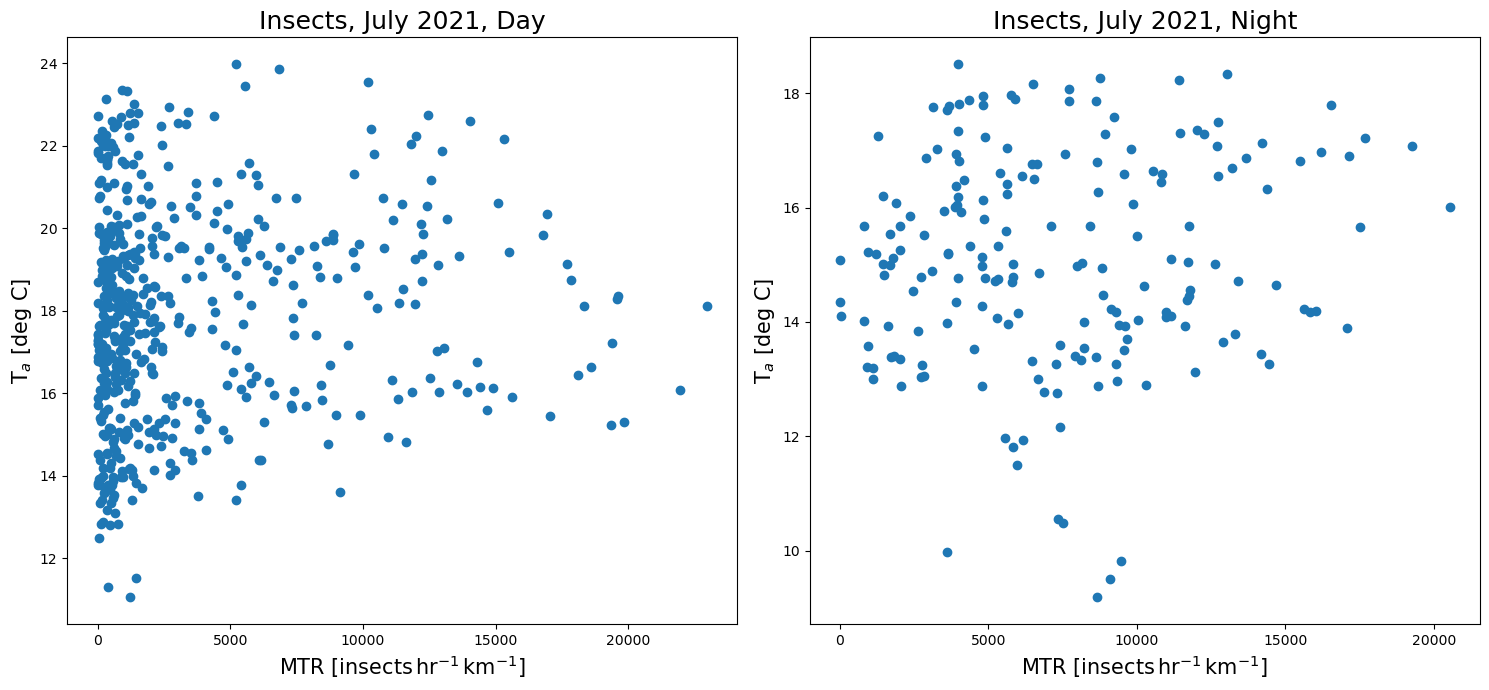

In [115]:
plt.figure(figsize=(15,7))

ax = plt.subplot(121)

ax.scatter(mtr_insects_d,ta_AC_d)
ax.set_xlabel('MTR [insects$\/$hr$^{-1}$$\/$km$^{-1}$]', fontsize=15)
ax.set_ylabel('T$_a$ [deg C]', fontsize=15)
ax.set_title('Insects, July 2021, Day', fontsize=18)

ax = plt.subplot(122)

ax.scatter(mtr_insects_n,ta_AC_n)
ax.set_xlabel('MTR [insects$\/$hr$^{-1}$$\/$km$^{-1}$]', fontsize=15)
ax.set_ylabel('T$_a$ [deg C]', fontsize=15)
ax.set_title('Insects, July 2021, Night', fontsize=18)

plt.tight_layout()
#plt.savefig(OUT_PATH + 'mtr_ta_scatter_202107.png') #, facecolor='white')